In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


###Importing dataset (Do not Touch code above)
We are going to use Predicting Heart Failures dataset for this project (citation is at the end of this jupiter notebook).

###Purpose of Project
We want to create a model where we can predict if a person will have a heart failure or not. This model will hopefully be used for medical institutions for helping in research for heart failures and finding the main causes for heart failures.
There are 13 columns in the dataset and 12 of them are the features which are:
Age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking and time.
The label that we want to predict is Molarity and we want to check if the patient will have a heart failure or not through our model.
#Something important to mention
The "time" feature doesn't affect if the patient will have a heart failure or not, as it only states what is the patient's remaining time till their heart fail on them (if they have it in the first place) and it will be not used in the model. It could be considered as a label if we want to predict when the patient will have a heart failure or not. However, that is not the main goal of this project which is predicting molarity of patients.
###What will be used
We will try create multiple learning algorithms like Support Vector Classifier (SVC), Decision Tree (DT), Support Vector Machine (Linear) and Logistic Regression. Then we decide which one is considered the best for this dataset.

In [ ]:
import io;
import pandas as pd;
import numpy as np; import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

d = []; 

with open( "heart_failure_clinical_records_dataset.csv", "r" ) as source:
    for line in source:
        line = line.replace( ',', '\t'); # get rid of semi-colons
        line = line.replace( '\n' , '' );  # get rid of newline characters
        fields = line.split( '\t' ); # split based on tab characters
        d.append(fields);

N = len( d )-1; 
n = len( d[0] ) -2; 
data = np.zeros( (N,n) )
label = np.zeros( (N,1) )

for y in range(0,N): #features data minus "time" feature/label data
  for i in range(0,n):
    data[y,i] = d[y+1][i]; 

for x in range(0,N): #Label data (Molarity)
  label[x,0] = d[x+1][12]


feature_names = d[0][0:11]; #grab the names of features from 0 to 10
labels = ["Alive","Dead"]


Load and clean up the dataset. Then assign features and label data seperately.

#Support Vector Classifier

In [ ]:
def classification_check(data, label):
    
    from sklearn.model_selection import train_test_split
    Xtrain, Xtest, ytrain, ytest = train_test_split(data, label)

    from sklearn.svm import SVC # "Support vector classifier"
    model = SVC(kernel='linear')
    model.fit(Xtrain,ytrain)
    np.set_printoptions(precision=4)
    ypred = model.predict(Xtest)
    
    from sklearn.metrics import plot_confusion_matrix
    
    title = "Confusion matrix"
    
    disp = plot_confusion_matrix(model, Xtest, ytest,display_labels=labels,cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    
    return;


We borrowed a function from E221 and tweaked it slightly so it can make it easier to get SVC model.

TSNE 3 dimensions kl_divergence 0.3401311592175338
TSNE 2 dimensions kl_divergence 0.12910887027799595 The Best One
TSNE 1 dimension kl_divergence 0.1739051252894368
Confusion matrix
[[50  0]
 [25  0]]


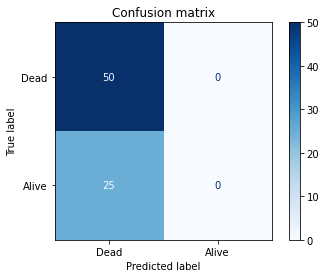

In [ ]:
from sklearn.manifold import TSNE
tsne3 = TSNE(n_components=3,learning_rate=100,perplexity = 30,early_exaggeration = 12,init = 'random',  method='exact' , random_state=2020)
X_tsne3 = tsne3.fit_transform(data)
print ("TSNE 3 dimensions kl_divergence",tsne3.kl_divergence_ );

tsne2 = TSNE(n_components=2,learning_rate=100,perplexity = 30,early_exaggeration = 12,init = 'random',  method='exact' , random_state=2020)
X_tsne2 = tsne2.fit_transform(data)
print ("TSNE 2 dimensions kl_divergence",tsne2.kl_divergence_ ,"The Best One");

tsne1 = TSNE(n_components=1,learning_rate=100,perplexity = 30,early_exaggeration = 12,init = 'random',  method='exact' , random_state=2020)
X_tsne1 = tsne1.fit_transform(data)
print ("TSNE 1 dimension kl_divergence",tsne1.kl_divergence_ );

classification_check(X_tsne2,label.ravel())

We used TSNE to reduce dimensions of dataset and we wrote best 3 TSNE examples above becuase they have low KL divergence (basically the closer it is to zero, the accuracy will be better). We used TSNE 2 dimensions in SVC model because it had the lowest KL divergence between the three. However, when we put our predictions against the real numbers in a confusion matrix, most of our predictions indicate that all of the patients will die even that's not true because it got 27 False Positives which means they predicted those 27 patients will die but they are alive. This doesn't look very well and we can assume this algorithm is not suitable for this dataset.

#Decision Tree

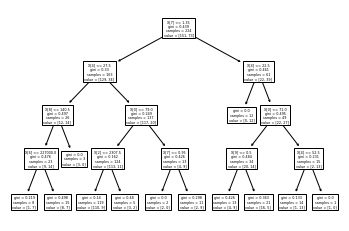

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
np.random.seed(4)
my_tree = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes=12)
Xtrain, Xtest, ytrain, ytest = train_test_split(data, label.ravel())
fig = my_tree.fit(Xtrain,ytrain.ravel())
tree.plot_tree(fig)
fig1 = tree.plot_tree(fig)


plt.savefig('Tree.pdf')

In [ ]:
ypred = my_tree.predict( Xtest ); 

from sklearn.metrics import r2_score 

r2_score = r2_score( ytest , ypred )
print("R2 Score = ", r2_score)

R2 Score =  -0.4423076923076925


Decision tree (DT) have been tested multiple times and we think the parameters that we chose for DT are good for this dataset. It helped us indentify the most impacting features (which we will use later) which are: 
Age(0), Creatinine Phosphokinase(2), Ejection Fraction(4), Serum Creatinine(7), Serum Sodium(8) and Sex(9).
Then we used R2 score to test it. If the score was near 1, it means that data fits well in the model while 0 is the opposite. What we got from R2 score is a negative number which means that the model is really bad and mostly likely it's a wrong form of model to fit. So we recommend to not use this for the dataset.

#Support Vector Machine (Linear) and Logistic Regression

In [ ]:
def assess_Boolean_model( model , test_data, truth_values ):
    TP = 0; FP = 0; 
    TN = 0; FN = 0; 
    for n in range( 0, len(truth_values) ) : 
        sample = test_data[n,:]; 
        if sample.shape[0] == 1:    # sklearn wants a 2D matrix here 
            sample = sample.reshape(-1,1);
        if len( sample.shape ) == 1: # sklearn wants a 2D matrix here 
            sample = sample.reshape(1,-1);
        model_prediction = model.predict( sample ); 
        if   model_prediction == truth_values[n] and model_prediction == True: 
            TP += 1; 
        if   model_prediction == truth_values[n] and model_prediction == False: 
            TN += 1; 
        if   model_prediction != truth_values[n] and model_prediction == True: 
            FP += 1; 
        if   model_prediction != truth_values[n] and model_prediction == False: 
            FN += 1; 
    return TP, TN, FP, FN;


def model_performance(TP, TN, FP, FN):
    accuracy = (TP+TN) / (TP + FN + TN + FN)
    precision = (TP/ (TP + FP))
    sensitivity = TP / (TP + FN)
    f1 = (2*TP)/(2*TP + FP + FN)
    
    return accuracy, precision, sensitivity, f1




We borrowed 2 functions from E221 Lab notes, one for getting values (predictions [TP, TN, FP, FN]) for confusion matrix and the other function is to use those predictions to check if the model performs well.

###Support Vector Machine (Linear)

Plotting ROC curve codes ware retrieved from E221 and were modified and it's true for the rest of ROC curves that are used later for Logistic Regression.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


True Positive=  23 ,True Negative=  0 ,False Positive=  52 ,False Negative=  0


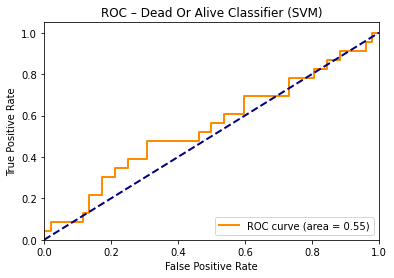

In [ ]:
# SVM fitting 
from sklearn.metrics import *
from sklearn import svm
svm_model = svm.LinearSVC(max_iter=100)
np.random.seed(2);
svm_model.fit( Xtrain , ytrain.ravel() ); 

[TP,TN,FP,FN] = assess_Boolean_model(svm_model, Xtest,ytest)

print("True Positive= ",TP, 
      ",True Negative= ",TN, 
      ",False Positive= ",FP,
      ",False Negative= ", FN)

# ROC curve 
Scores_Testing = svm_model.decision_function( Xtest );
fpr, tpr , thresholds = roc_curve( ytest, Scores_Testing ) 
roc_auc = auc( fpr, tpr ) 

plt.figure(1)
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC – Dead Or Alive Classifier (SVM)')
plt.legend(loc="lower right")
plt.savefig( 'ROC All features (Linear).png' , dpi=900 )
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


True Positive=  21 ,True Negative=  24 ,False Positive=  28 ,False Negative=  2


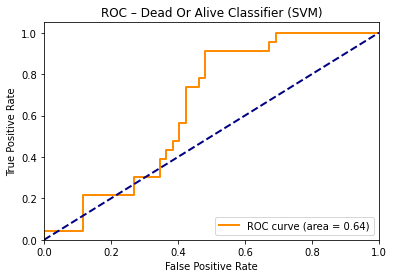

In [ ]:
# SVM fitting 
from sklearn.metrics import *
from sklearn import svm
svm_model = svm.LinearSVC()
np.random.seed(2);
svm_model.fit( Xtrain[:,(0,2,4,7,8,9)] , ytrain.ravel() ); 
#Xtrain[:,(0,2,4,7,8,9)]
[TP,TN,FP,FN] = assess_Boolean_model(svm_model, Xtest[:,(0,2,4,7,8,9)],ytest)

print("True Positive= ",TP, 
      ",True Negative= ",TN, 
      ",False Positive= ",FP,
      ",False Negative= ", FN)
# ROC curve 
Scores_Testing = svm_model.decision_function( Xtest[:,(0,2,4,7,8,9)] );
fpr, tpr , thresholds = roc_curve( ytest, Scores_Testing ) 
roc_auc = auc( fpr, tpr ) 

plt.figure(2)
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC – Dead Or Alive Classifier (SVM)')
plt.legend(loc="lower right")
plt.savefig( 'ROC Important features (Linear).png' , dpi=900 )
plt.show()

We plotted 2 examples of Receiver Operator Characteristic (ROC) curve (First one with all features and the others with the important features (data[:,(0,2,4,7,8,9)]). Roc curve help us visualize trade off between sensitivity and precision. The ideal curve is to have area under 1.0. Comparing between the two graphs, the graph with important features have better score than all features. We conclude that there are unnecessary features that hinders with the model. area = 0.64 isn't that bad but it can be better by using the following algorithm.

#Logistic Regression


True Positive=  8 ,True Negative=  46 ,False Positive=  4 ,False Negative=  17
accuracy=  0.6136363636363636 ,precision=  0.6666666666666666 ,sensitivity=  0.32 ,f1=  0.43243243243243246


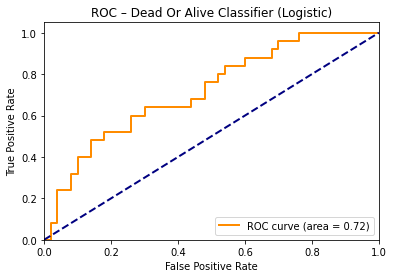

In [ ]:
from sklearn.linear_model import LogisticRegression
Xtrain, Xtest, ytrain, ytest = train_test_split(data, label.ravel())

logistic_reg_model = LogisticRegression(random_state = 0,max_iter=100).fit(Xtrain, ytrain)

[TP,TN,FP,FN] = assess_Boolean_model(logistic_reg_model, Xtest,ytest)

print("True Positive= ",TP, 
      ",True Negative= ",TN, 
      ",False Positive= ",FP,
      ",False Negative= ", FN)


accuracy, precision, sensitivity, f1 = model_performance(TP,TN,FP,FN)
print("accuracy= ",accuracy, 
      ",precision= ",precision, 
      ",sensitivity= ",sensitivity,
      ",f1= ", f1)


np.random.seed(2);

logistic_reg_model.fit( Xtrain , ytrain.ravel() ); 


# ROC curve 
from sklearn.metrics import *
Scores_Testing = logistic_reg_model.decision_function( Xtest );
fpr, tpr , thresholds = roc_curve( ytest, Scores_Testing ) 
roc_auc = auc( fpr, tpr ) 

plt.figure(1)
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC – Dead Or Alive Classifier (Logistic)')
plt.legend(loc="lower right")
plt.savefig( 'ROC All features (Logistic).png' , dpi=900 )
plt.show()

True Positive=  11 ,True Negative=  44 ,False Positive=  6 ,False Negative=  14
accuracy=  0.6626506024096386 ,precision=  0.6470588235294118 ,sensitivity=  0.44 ,f1=  0.5238095238095238


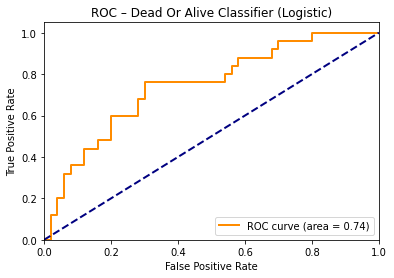

In [ ]:
np.random.seed(3);
logistic_reg_model.fit( Xtrain[:,(0,2,4,7,8,9)] , ytrain.ravel() ); 
#Xtrain[:,(0,2,4,7,8,9)]
[TP,TN,FP,FN] = assess_Boolean_model(logistic_reg_model, Xtest[:,(0,2,4,7,8,9)],ytest.ravel())

print("True Positive= ",TP, 
      ",True Negative= ",TN, 
      ",False Positive= ",FP,
      ",False Negative= ", FN)


accuracy, precision, sensitivity, f1 = model_performance(TP,TN,FP,FN)
print("accuracy= ",accuracy, 
      ",precision= ",precision, 
      ",sensitivity= ",sensitivity,
      ",f1= ", f1)

# ROC curve 
Scores_Testing = logistic_reg_model.decision_function( Xtest[:,(0,2,4,7,8,9)] );
fpr, tpr , thresholds = roc_curve( ytest, Scores_Testing ) 
roc_auc = auc( fpr, tpr ) 

plt.figure(0)
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC – Dead Or Alive Classifier (Logistic)')
plt.legend(loc="lower right")
plt.savefig( 'ROC Important features (Logistic).png' , dpi=900 )
plt.show()

We did the excat same process as before in SVM but this time we did it in a logistic regression model and it have us better result than before. Once again, the ROC curve graph of important features (area =0.80) is higher than all features (area = 0.71) because we only used useful features that help us to predict better when there will be a heart failure or not.

#Conclusion
I think the best algorithm that was tested for this dataset is Logistic Regression as it gave us better predictions than other Machine Learning methods.

###Citation
1. Predicting Heart Failures. The original dataset version was collected by Tanvir Ahmad et al. (Government College University, Faisalabad, Pakistan) and made available by them on FigShare under the Attribution 4.0 International (CC BY 4.0: freedom to share and adapt the material) copyright July 2017.  The current version of the dataset was elaborated by Davide Chicco (Krembil Research Institute, Toronto, Canada) and donated to the University of California Irvine Machine Learning Repository under the same Attribution 4.0 International (CC BY 4.0) copyright in January 2020. A copy of the dataset can be found on the Kaggle site here:https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
2. Some functions and codes were retrieved from E221 lecture and lab notes. (I commented for which one)

In [64]:
import sklearn
import pandas as pd 
import numpy as np
missing_value=["Undefined"]
data = pd.read_csv("heart_failure_clinical_records_dataset.csv", na_values=missing_value) 
data.head()

np.sum(data.isnull())

# Here we are using the 12 features to predict the liklihood of a death event. 

Y = data['DEATH_EVENT']
Y = Y[1:]
#X = data.drop(['anaemia','platelets','smoking','time','DEATH_EVENT'], axis=1)
X = data.drop(['DEATH_EVENT'], axis=1)
X = X[1:]

print(X.shape, Y.shape)




(298, 12) (298,)


In [65]:
# Now we need to look at Y
# 70/30

from collections import Counter

original_counts = Counter(Y)
print(original_counts)


# now lets balance the data
from imblearn.over_sampling import SMOTE
over = SMOTE()
X_new, Y_new = over.fit_resample(X,Y)
new_counts = Counter(Y_new)
print(new_counts)

# The deprication warning should be resolved. https://github.com/skorch-dev/skorch/issues/612


Counter({0: 203, 1: 95})
Counter({1: 203, 0: 203})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization with out the use of SMOTE.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=0)

pca = PCA()

logistic = LogisticRegression(max_iter=100000, tol=0.1)

pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# This grid search is exhaustive and time consuming. 

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [2, 4, 8, 10, 12],
    'logistic__C': np.logspace(-4, 4, 6),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(x_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.787):
{'logistic__C': 10000.0, 'pca__n_components': 8}


In [67]:
search.best_params_
np.logspace(-4,4,6)

array([1.00000000e-04, 3.98107171e-03, 1.58489319e-01, 6.30957344e+00,
       2.51188643e+02, 1.00000000e+04])

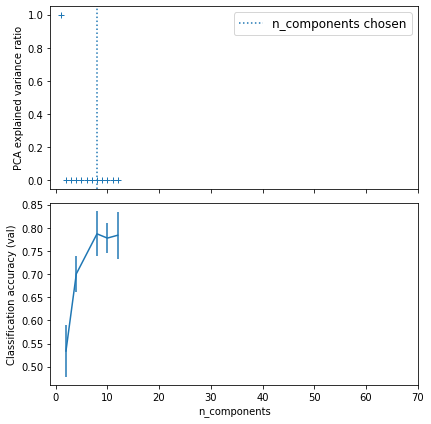

In [68]:
# Visulaize the PCA
# This section is about using PCA to find the optimal combination of features
# https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html

pca.fit(x_train)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()

In [69]:
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=0)

pca = PCA(n_components=12)
stdscl = StandardScaler()
logistic = LogisticRegression(C = 0.15848931924611143, max_iter=100000, tol=0.1)


pipe = Pipeline(steps=[('standardscalar', stdscl),('pca', pca), ('logistic', logistic)])

In [70]:
my_mdl = pipe.fit(x_train, y_train)
my_mdl.score(x_test,y_test)

0.8780487804878049

In [71]:
my_prediction = my_mdl.predict(x_test)
print(my_prediction)

[0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0
 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1
 1 0 1 1 0 1 0 0]


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, my_prediction, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        38
           1       0.87      0.91      0.89        44

    accuracy                           0.88        82
   macro avg       0.88      0.88      0.88        82
weighted avg       0.88      0.88      0.88        82



In [73]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, my_prediction)
conf

array([[32,  6],
       [ 4, 40]])

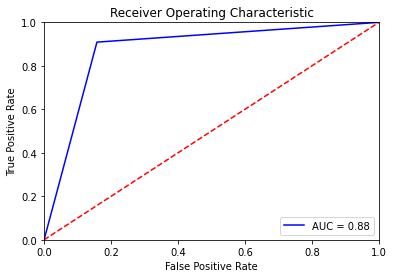

In [74]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = pipe.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, my_prediction)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [102]:
from sklearn import datasets, svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new)

class_names = ['Alive','Dead']

svm_classifier = make_pipeline(StandardScaler(), SVC(gamma='auto'))
my_model = svm_classifier.fit(X_train, y_train)
print(sklearn.__version__)
print(imblearn.__version__)

0.22.2.post1
0.4.3


In [103]:
from joblib import dump, load 
dump(my_model, 'svc_model.pkl')

['svc_model.pkl']

In [105]:
def my_prediction(id):
    dummy = np.array(id)
    dummyT = dummy.reshape(1,-1)
    r = dummy.shape
    t = dummyT.shape
    r_str = json.dumps(r)
    t_str = json.dumps(t)
    prediction = my_model.predict(dummyT)
    print(prediction)
    #name_str = json.dumps(prediction.tolist())
    name = class_names[ int(prediction)]
    print(name)
    string = [t_str, r_str, name]
    return string


In [106]:
from sklearn import datasets
from joblib import load
import numpy as np
import json

#Load my model

my_model = load('svc_model.pkl')

my_prediction([75,0,582,0,20,1,265000,1.9,130,1,0,4])

[1]
Dead


['[1, 12]', '[12]', 'Dead']